In [59]:
from scipy import stats
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import math

In [60]:
def arr_print(x):
    for i in range(len(x)):
        print(x[i], end = "\t")
        if (i % 10 == 9): print()

In [61]:
def del_repeat(x, x_c):
    for i in range(1, len(x)):
        if (x[i] != x_c[-1]):
            x_c.append(x[i])

In [62]:
def chance_arrays(x, x_c, n, w):
    for i in range(len(x_c)):
        n.append(Counter(x)[x_c[i]])
        w.append(n[-1] / len(x))

In [63]:
def emperic_and_distribution(x, x_c, a, b, n):
    sum = 0
    plt.grid(True)
    plt.xticks(np.arange(a, b + 1, 1))
    plt.yticks(np.arange(0, 1.1, 0.1))
    for i in range(len(x_c) - 1):
        sum += Counter(x)[x_c[i]] / n
        X = [x_c[i], x_c[i + 1]]
        Y = [sum, sum]
        plt.plot(X, Y, color = 'blue')
    diag_x = [a, b]
    diag_y = [0, 1]
    plt.plot(diag_x, diag_y, color = 'red')
    plt.show()

In [64]:
def find_F_x(a, b, x):
    if x < a:
        return 0
    elif x > b:
        return 1
    else:
        return (x-a)/(b-a)

In [65]:
def find_Fn_x(N, j): return float(j) / N

In [66]:
def find_Fn_x0(N, j): return (float(j) - 1) / N

In [67]:
def make_table_4_1or3or4(x, a, b, N, table, num):
    Dn = -1
    xdot = -1
    ind = -1
    for i in range(N):
        fs = []
        if num == 1:
            fs = [abs(find_Fn_x(N=N, j=i) - find_F_x(a=a, b=b, x=x[i])), 
                  abs(find_Fn_x0(N=N, j=i) - find_F_x(a=a, b=b, x=x[i]))]
        elif num == 3:
            fs = [find_Fn_x(N=N, j=i) - find_F_x(a=a, b=b, x=x[i]), 
                  find_Fn_x0(N=N, j=i) - find_F_x(a=a, b=b, x=x[i])]
        elif num == 4:
            fs = [find_F_x(a=a, b=b, x=x[i]) - find_Fn_x(N=N, j=i), 
                  find_F_x(a=a, b=b, x=x[i]) - find_Fn_x0(N=N, j=i)]
        if max(fs) > Dn:
            Dn = max(fs)
            ind = i
            xdot = x[i]
    DnsqrtN = Dn * math.sqrt(N)
    F_xdot = find_F_x(a=a, b=b, x=xdot)
    Fn_xdot = find_Fn_x(N=N, j=ind+1)
    Fn_xdot_minus_zero = find_Fn_x0(N=N, j=ind+1)
    table = [a, b, N, Dn, DnsqrtN, xdot, F_xdot, Fn_xdot, Fn_xdot_minus_zero]
    return table

In [68]:
def print_table__2(D, a, xa):
    if D < xa: print(round(D, 5), a, xa, "Да", sep = "\t")
    else: print(round(D, 5), a, xa, "Нет", sep = "\t")

In [69]:
def print_table__3(a, pval):
    if pval < a: print(a, round(pval, 5), "Нет", sep = "\t")
    else: print(a, round(pval, 5), "Да", sep = "\t")

In [70]:
#0.01 = 1.63, 0.02 = 1.57, 0.05 = 1.36, 0.1 = 1.22, 0.2 = 1.07
def check_4_1(D, pval, a):
    xa = 0
    if a == 0.01: xa = 1.63
    elif a == 0.02: xa = 1.57
    elif a == 0.05: xa = 1.36
    elif a == 0.1: xa = 1.22
    elif a == 0.2: xa = 1.07
        
    if D < xa: print(round(D, 5), " <= ", xa, ", значит не противоречит эксперементальным данным", sep = "")
    else: print(round(D, 5), " > ", xa, ", значит противоречит эксперементальным данным", sep = "")
    print()
    print_table__2(D=D, a=a, xa=xa)
    print()
    
    if pval < a: print(round(pval, 5), " < ", a, ", значит противоречит эксперементальным данным", sep = "")
    else: print(round(pval, 5), " >= ", a, ", значит не противоречит эксперементальным данным", sep = "")
    print()
    print_table__3(a=a, pval=pval)
    

In [71]:
def show_two_emperic(x1, x1_c, x2, x2_c, a, b, n):
    sum1 = sum2 = 0 
    plt.grid(True)
    plt.xticks(np.arange(a, b + 1, 1))
    plt.yticks(np.arange(0, 1.1, 0.1))
    for i in range(len(x1_c) - 1):
        sum1 += Counter(x1)[x1_c[i]] / n
        X1 = [x1_c[i], x1_c[i + 1]]
        Y1 = [sum1, sum1]
        plt.plot(X1, Y1, color = 'blue')
    for i in range(len(x2_c) - 1):
        sum2 += Counter(x2)[x2_c[i]] / n
        X2 = [x2_c[i], x2_c[i + 1]]
        Y2 = [sum2, sum2]
        plt.plot(X2, Y2, color = 'red')
    plt.show()

In [72]:
def find_max(findx, helpx, result):
    j = 0
    for i in range(len(findx)):
        fs = []
        if findx[i] < helpx[0]: fs = [abs(find_Fn_x(j=i, N=len(findx))), abs(find_Fn_x0(j=i, N=len(findx)))]
        elif findx[i] >= helpx[-1]: fs = [abs(find_Fn_x(j=i, N=len(findx)) - 1), abs(find_Fn_x0(j=i, N=len(findx)) - 1)]
        else:
            while (findx[i] >= helpx[j]): j += 1
            fs = [abs(find_Fn_x(j=i, N=len(findx)) - (j - 1) / len(helpx)), 
                  abs((j - 1) / len(helpx) - find_Fn_x0(j=i, N=len(findx)))]
        if result[0] < max(fs):
            result[0] = max(fs)
            result[1] = i
    return result

In [73]:
def find_Fm_from0toxdot(findx, maxfromx, helpx):
    j = 0
    while findx[maxfromx[1]] >= helpx[j]: j += 1
    return float(j+1) / len(helpx)

In [74]:
def make_table_4_2(x1, x2, a, b, N, table, M):
    Dn = -1
    xdot = -1
    maxfrom1 = [-1, -1]
    maxfrom2 = [-1, -1]
    check = 0
    find_max(findx=x1, helpx=x2, result=maxfrom1)
    find_max(findx=x2, helpx=x1, result=maxfrom2)
    xdotel = 0
    if maxfrom1[0] < maxfrom2[0]:
        Dn = maxfrom2[0]
        xdot = maxfrom2[1]
        xdotel = x2[xdot]
        check = 1
    else:
        Dn = maxfrom1[0]
        xdot = maxfrom1[1]
        xdotel = x1[xdot]
        check = 2
    Knm = Dn * math.sqrt(N * M / (N + M))
    six = seven = eight = nine = 0
    if check == 1:
        maxfrom1, maxfrom2 = maxfrom2, maxfrom1
    six = find_Fn_x(j=maxfrom1[1] + 1, N=N)
    seven = find_Fn_x0(j=maxfrom1[1] + 1, N=N)
    eight = find_Fm_from0toxdot(findx=x1, maxfromx=maxfrom1, helpx=x2)
    nine = (find_Fm_from0toxdot(findx=x1, maxfromx=maxfrom1, helpx=x2) * len(x2) - 1) / len(x2)
    table = [N, M, Dn, Knm, xdotel, six, seven, eight, nine]
    return table

In [75]:
def print_table_4_3or4_2(D, s_a, a):
    if D < s_a: print(round(D, 5), a, round(s_a, 5), "H0", sep = "\t")
    else: print(round(D, 5), a, round(s_a, 5), "H1", sep = "\t")
    print("не забудь в ворде переделать последний столбец")

In [76]:
def check_4_3or4(D, s_a, a):

    if D < s_a: print(round(D, 5), " <= ", round(s_a, 5), ", значит принимается основная гипотеза", sep = "")
    else: print(round(D, 5), " > ", round(s_a, 5), ", значит принимается конкурирующая гипотеза", sep = "")
    print()
    print_table_4_3or4_2(D=D, a=a, s_a=s_a)
    print()

In [77]:
#GLOBAL
level_value = 0.05
s_alpha = math.sqrt(-0.5*math.log(level_value))
s_alpha

1.2238734153404083

# 4.1

In [78]:
x1 = [2.58, 4, 3.62, 0.61, 0.22, 1.76, 4.32, 1.83, 1.36]
arr_print(x1)
x1.sort()

2.58	4	3.62	0.61	0.22	1.76	4.32	1.83	1.36	

In [79]:
arr_print(x1)
x1_c = [x1[0]]
del_repeat(x = x1, x_c = x1_c)
n_x1 = []
w_x1 = []
chance_arrays(n=n_x1, w=w_x1, x=x1, x_c=x1_c)

0.22	0.61	1.36	1.76	1.83	2.58	3.62	4	4.32	

In [80]:
a = 0
b = 5
N = len(x1)

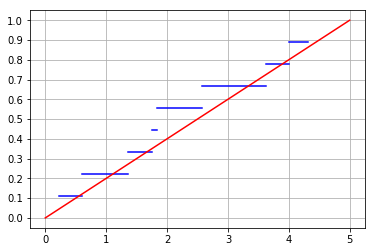

In [81]:
emperic_and_distribution(x = x1, x_c = x1_c, a = a, b = b, n = N)

In [82]:
z_4_1 = stats.kstest(x1, 'uniform', args = (a, b))[1]
z_4_1

0.90285958257138688

In [83]:
#0 - a, 1 - b, 2 - N, 3 - D, 4 - DsqrtN, 5 - xdot, 6 - F_xdot, 7 - Fn_xdot, 8 - Fn_xdot_minus_zero
table_4_1 = []
D = DsqrtN = xdot = F_xdot = Fn_xdot = Fn_xdot_minus_zero = -1
table_4_1 = make_table_4_1or3or4(x=x1, a=a, b=b, N=N, table = table_4_1, num=1)
print('\t'.join(str(round(i, 5)) for i in table_4_1))

0	5	9	0.16844	0.50533	3.62	0.724	0.77778	0.66667


In [84]:
check_4_1(D=table_4_1[4], pval=z_4_1, a=level_value)

0.50533 <= 1.36, значит не противоречит эксперементальным данным

0.50533	0.05	1.36	Да

0.90286 >= 0.05, значит не противоречит эксперементальным данным

0.05	0.90286	Да


# 4.2

In [85]:
x2 = [7.92808, 3.88546, 1.28455, 7.81072, 2.01184, 0.86551, 2.53555, 0.89404, 9.27880, 9.54151,
6.70372, 5.85610, 8.51668, 6.40546, 6.19531, 1.11094, 5.87662, 2.60611, 8.08207, 0.76075,
3.20569, 4.07311, 4.74532, 2.44456, 1.85722, 5.19883, 9.51244, 8.35783, 2.08456, 1.38706,
5.11108, 3.01705, 5.88121, 9.52144, 3.56182, 4.52995, 1.46248, 4.15456, 8.48374, 3.83650,
3.22387, 8.62693, 6.52660, 1.38760, 5.93962, 2.46076, 6.76843, 4.42123, 5.69401, 5.62948,
1.89772, 2.59783, 2.95711, 4.40872, 1.42918, 1.40137, 7.96111, 5.65081, 7.71514, 1.21021,
7.80676, 1.10761, 8.20519, 3.92119, 9.41407, 7.30330, 7.35946, 9.51775, 1.59253, 4.44571,
1.31308, 7.27396, 5.00371, 4.02793, 3.51808, 1.85965, 2.88889, 5.98183, 8.39419, 8.36971,
2.31622, 3.08077, 8.45197, 4.06888, 6.04303, 2.60233, 2.81392, 5.81488, 8.82025, 7.49986,
1.59766, 3.33097, 6.78418, 5.93899, 1.05487, 1.29454, 6.76015, 3.32971, 9.22165, 7.91062,
4.97320, 3.14710, 3.23296, 8.21419, 1.22236, 1.55149, 7.96435, 2.51467, 1.47751, 7.40050,
0.70324, 6.89857, 1.19230, 2.61538, 2.50252, 4.49719, 5.97373, 9.55699, 3.26923, 9.44044,
9.37465, 3.06772, 2.19436, 4.58476, 7.70623, 1.35727, 8.09899, 8.13814, 8.67175, 5.46775,
7.84438, 4.60321, 9.65491, 3.60430, 4.82020, 3.57784, 3.85828, 9.69172, 2.44762, 9.16612,
8.19367, 8.15173, 7.80712, 1.77406, 2.85802, 1.92238, 6.97156, 3.62437, 7.17487, 1.62565,
2.48056, 2.93911, 7.69768, 6.86518, 6.21016, 0.96334, 4.98130, 9.29626, 1.28194, 9.10996,
1.36987, 4.17445, 0.86767, 7.73512, 8.61442, 9.44152, 9.25675, 3.56452, 0.96064, 5.68105,
5.90173, 0.72538, 7.83106, 3.31540, 4.19893, 1.01158, 6.11386, 2.40541, 6.90676, 5.80192,
3.93640, 4.21657, 8.01673, 5.47783, 0.99313, 7.36234, 1.42270, 7.82179, 1.24342, 7.01998,
4.42240, 0.98260, 8.62972, 4.56928, 8.16721, 8.22679, 7.03339, 8.54062, 0.95164, 0.96631,
2.42620, 9.38977, 7.97245, 1.19815, 2.06953, 1.96684, 6.66673, 6.89767, 9.37654, 4.38118,
1.49857, 5.92000, 2.95495, 0.98359, 3.81580, 5.90758, 8.42002, 6.86104, 6.74575, 1.42945,
8.58742, 3.92191, 5.52247, 9.32263, 6.99820, 6.43579, 9.53260, 8.62450, 3.44113, 0.73708,
7.79677, 2.36401, 3.99004, 6.14149, 2.12704, 8.00674, 5.97688, 2.62708, 3.84883, 8.87632,
1.84390, 7.71199, 1.15891, 3.64327, 1.16827, 2.81707, 4.11811, 9.36565, 1.59820, 3.44482,
5.50384, 9.13552, 5.09326, 5.84341, 7.88938, 4.99462, 6.40501, 5.82352, 8.32282, 8.29492,
6.31681, 2.49316, 8.24839, 4.91506, 1.68469, 1.84498, 5.78788, 7.79362, 7.35406, 3.06898]
arr_print(x2)
x2.sort()
M = len(x2)

7.92808	3.88546	1.28455	7.81072	2.01184	0.86551	2.53555	0.89404	9.2788	9.54151	
6.70372	5.8561	8.51668	6.40546	6.19531	1.11094	5.87662	2.60611	8.08207	0.76075	
3.20569	4.07311	4.74532	2.44456	1.85722	5.19883	9.51244	8.35783	2.08456	1.38706	
5.11108	3.01705	5.88121	9.52144	3.56182	4.52995	1.46248	4.15456	8.48374	3.8365	
3.22387	8.62693	6.5266	1.3876	5.93962	2.46076	6.76843	4.42123	5.69401	5.62948	
1.89772	2.59783	2.95711	4.40872	1.42918	1.40137	7.96111	5.65081	7.71514	1.21021	
7.80676	1.10761	8.20519	3.92119	9.41407	7.3033	7.35946	9.51775	1.59253	4.44571	
1.31308	7.27396	5.00371	4.02793	3.51808	1.85965	2.88889	5.98183	8.39419	8.36971	
2.31622	3.08077	8.45197	4.06888	6.04303	2.60233	2.81392	5.81488	8.82025	7.49986	
1.59766	3.33097	6.78418	5.93899	1.05487	1.29454	6.76015	3.32971	9.22165	7.91062	
4.9732	3.1471	3.23296	8.21419	1.22236	1.55149	7.96435	2.51467	1.47751	7.4005	
0.70324	6.89857	1.1923	2.61538	2.50252	4.49719	5.97373	9.55699	3.26923	9.44044	
9.37465	3.06772	2.19436	4.58476	7.7062

In [86]:
arr_print(x2)
x2_c = [x2[0]]
del_repeat(x = x2, x_c = x2_c)
n_x2 = []
w_x2 = []
chance_arrays(n=n_x2, w=w_x2, x=x2, x_c=x2_c)

0.70324	0.72538	0.73708	0.76075	0.86551	0.86767	0.89404	0.95164	0.96064	0.96334	
0.96631	0.9826	0.98359	0.99313	1.01158	1.05487	1.10761	1.11094	1.15891	1.16827	
1.1923	1.19815	1.21021	1.22236	1.24342	1.28194	1.28455	1.29454	1.31308	1.35727	
1.36987	1.38706	1.3876	1.40137	1.4227	1.42918	1.42945	1.46248	1.47751	1.49857	
1.55149	1.59253	1.59766	1.5982	1.62565	1.68469	1.77406	1.8439	1.84498	1.85722	
1.85965	1.89772	1.92238	1.96684	2.01184	2.06953	2.08456	2.12704	2.19436	2.31622	
2.36401	2.40541	2.4262	2.44456	2.44762	2.46076	2.48056	2.49316	2.50252	2.51467	
2.53555	2.59783	2.60233	2.60611	2.61538	2.62708	2.81392	2.81707	2.85802	2.88889	
2.93911	2.95495	2.95711	3.01705	3.06772	3.06898	3.08077	3.1471	3.20569	3.22387	
3.23296	3.26923	3.3154	3.32971	3.33097	3.44113	3.44482	3.51808	3.56182	3.56452	
3.57784	3.6043	3.62437	3.64327	3.8158	3.8365	3.84883	3.85828	3.88546	3.92119	
3.92191	3.9364	3.99004	4.02793	4.06888	4.07311	4.11811	4.15456	4.17445	4.19893	
4.21657	4.38118	4.40872	4.42123	4.4224	4.

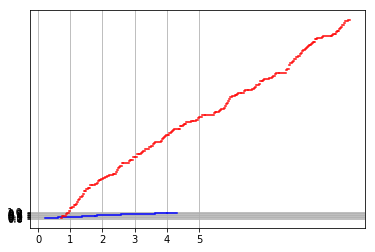

In [87]:
show_two_emperic(x1=x1, a=a, b=b, n=N, x1_c=x1_c, x2=x2, x2_c=x2_c)

In [88]:
pval = stats.ks_2samp(data1=x1, data2=x2)[1]
pval

0.0055596415941908013

In [89]:
#0 - a, 1 - b, 2 - N, 3 - D, 4 - DsqrtN, 5 - xdot, 6 - F_xdot, 7 - Fn_xdot, 8 - Fn_xdot_minus_zero
table_4_2 = []
D = DsqrtN = xdot = F_xdot = Fn_xdot = Fn_xdot_minus_zero = -1
table_4_2 = make_table_4_2(a=a, b=b, M=M, N=N, table=table_4_2, x1=x1, x2=x2)
print('\t'.join(str(round(i, 5)) for i in table_4_2))

IndexError: list index out of range

In [90]:
check_4_1(a=level_value, D=table_4_2[3], pval=pval)

IndexError: list index out of range

# 4.3 and 4.4

In [91]:
table_4_3 = []
D = DsqrtN = xdot = F_xdot = Fn_xdot = Fn_xdot_minus_zero = -1
table_4_3 = make_table_4_1or3or4(x=x1, a=a, b=b, N=N, table=table_4_3, num=3)
print('\t'.join(str(round(i, 5)) for i in table_4_3))

0	5	9	0.07844	0.23533	1.83	0.366	0.55556	0.44444


In [56]:
check_4_3or4(D=table_4_3[4], s_a=s_alpha, a=level_value)

0.23533 <= 1.22387, значит принимается основная гипотеза

0.23533	0.05	1.22387	H0
не забудь в ворде переделать последний столбец



In [57]:
table_4_4 = []
D = DsqrtN = xdot = F_xdot = Fn_xdot = Fn_xdot_minus_zero = -1
table_4_4 = make_table_4_1or3or4(x=x1, a=a, b=b, N=N, table=table_4_4, num=4)
print('\t'.join(str(round(i, 5)) for i in table_4_4))

0	5	9	0.16844	0.50533	3.62	0.724	0.77778	0.66667


In [36]:
check_4_3or4(D=table_4_4[4], s_a=s_alpha, a=level_value)

0.70887 <= 1.22387, значит принимается основная гипотеза

0.70887	0.05	1.22387	H0
не забудь в ворде переделать последний столбец

